In [22]:
!pip install ipympl
!pip install ipywidgets

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets


# Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [24]:
X=np.array([1.0,2.0])
y=np.array([300.0,500.0])

# Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [25]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w, b (scalar): Model parameters
    Returns:
        total_cost (float): Mean squared error cost
    """
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

# Plot cost vs w (replacing plt_intuition)

In [26]:
def plot_intuition(x_train, y_train, b=100):
    """
    Plots cost vs. w for a fixed b.
    """
    plt.close('all')
    fig, ax = plt.subplots(figsize=(8, 6))
    w_values = np.linspace(-100, 600, 100)
    costs = [compute_cost(x_train, y_train, w, b) for w in w_values]

    ax.plot(w_values, costs, 'b-', label=f'Cost (b={b})')
    ax.set_xlabel('w (slope)')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs. w (Fixed b)')
    ax.grid(True)
    ax.legend()
    plt.show()

# Interactive regression plot (replacing plt_stationary and plt_update_onclick)

In [27]:
def plot_interactive_regression(x_train, y_train):
    """
    Interactive plot with sliders for w and b, showing regression line and cost.
    """
    def update_plot(w=100, b=100):
        plt.close('all')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

        # Plot data and regression line
        ax1.scatter(x_train, y_train, color='blue', label='Data')
        x_range = np.linspace(min(x_train), max(x_train), 100)
        y_pred = w * x_range + b
        ax1.plot(x_range, y_pred, 'r-', label=f'y = {w:.1f}x + {b:.1f}')
        ax1.set_xlabel('x (Size in 1000 sq ft)')
        ax1.set_ylabel('y (Price in 1000s)')
        ax1.set_title('Linear Regression Fit')
        ax1.grid(True)
        ax1.legend()

        # Plot cost
        cost = compute_cost(x_train, y_train, w, b)
        ax2.bar([0], [cost], color='orange')
        ax2.set_ylim(0, max(compute_cost(x_train, y_train, 0, 0), 10000))
        ax2.set_xticks([])
        ax2.set_ylabel('Cost')
        ax2.set_title(f'Cost: {cost:.2f}')

        plt.show()

    interact(update_plot,
             w=widgets.FloatSlider(min=-200, max=600, step=10, value=100, description='w:'),
             b=widgets.FloatSlider(min=-200, max=400, step=10, value=100, description='b:'))

#  3D cost surface (replacing soup_bowl)

In [33]:
def plot_soup_bowl(x_train, y_train):
    """
    Plots a 3D surface of the cost function over w and b.
    """
    plt.close('all')
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    w_values = np.linspace(-200, 600, 50)
    b_values = np.linspace(-200, 400, 50)
    W, B = np.meshgrid(w_values, b_values)
    Z = np.array([[compute_cost(x_train, y_train, w, b) for w in w_values] for b in b_values])

    ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('w (slope)')
    ax.set_ylabel('b (intercept)')
    ax.set_zlabel('Cost')
    ax.set_title('Cost Function Surface')
    plt.show()

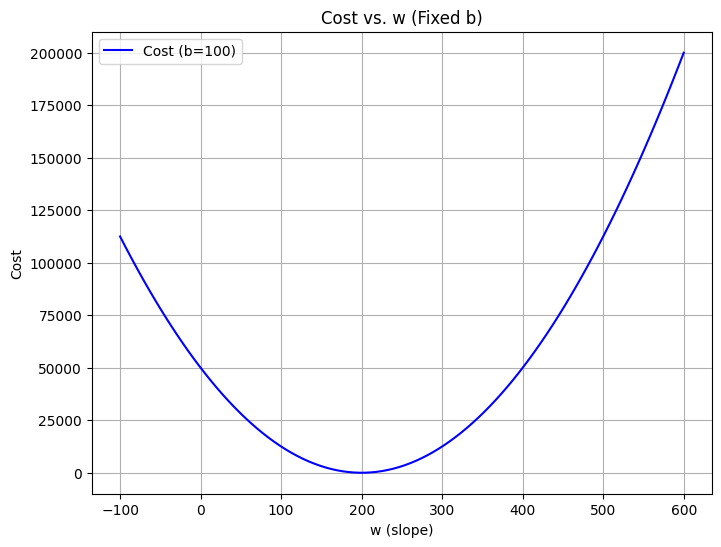

In [29]:
plot_intuition(X,y)

In [31]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])
plot_interactive_regression(x_train, y_train)

interactive(children=(FloatSlider(value=100.0, description='w:', max=600.0, min=-200.0, step=10.0), FloatSlide…

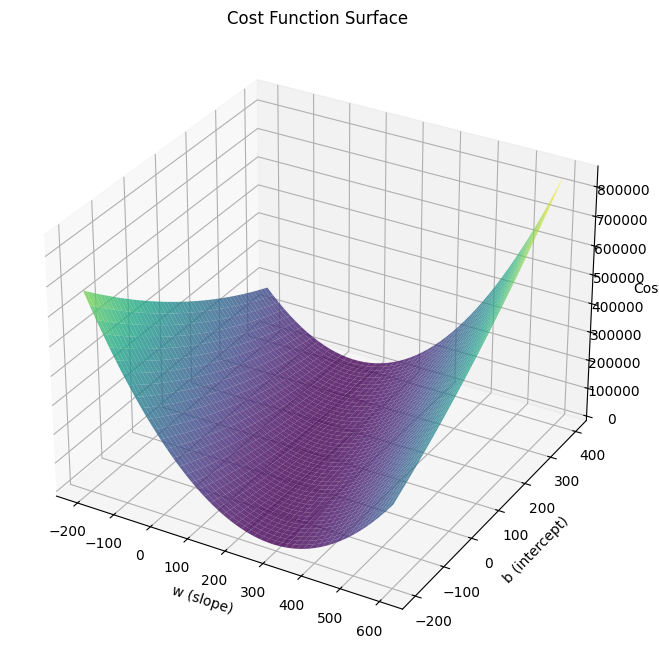

In [34]:
plot_soup_bowl(x_train, y_train)